In [61]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
#import dataframe
df = pd.read_csv('kyphosis.csv')

In [63]:
#explore dataframe
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [65]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


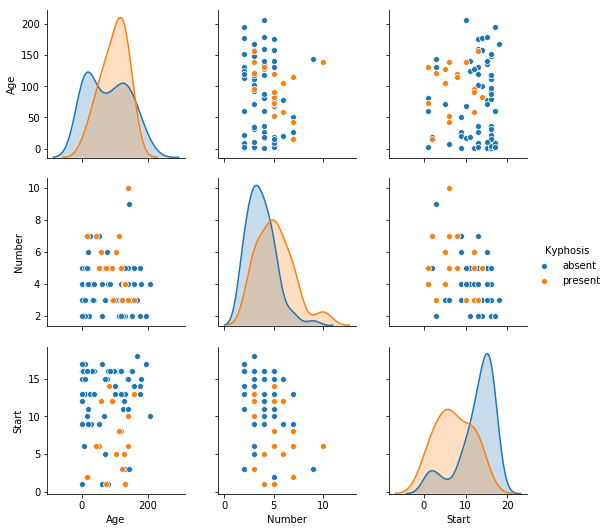

In [66]:
#pairplot
sns.pairplot(data=df, hue='Kyphosis')

In [67]:
#split data
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
#create decision tree model
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
#prediction
predictions = dtree.predict(X_test)

In [73]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[12  5]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

   micro avg       0.56      0.56      0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [75]:
#Tree visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [76]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

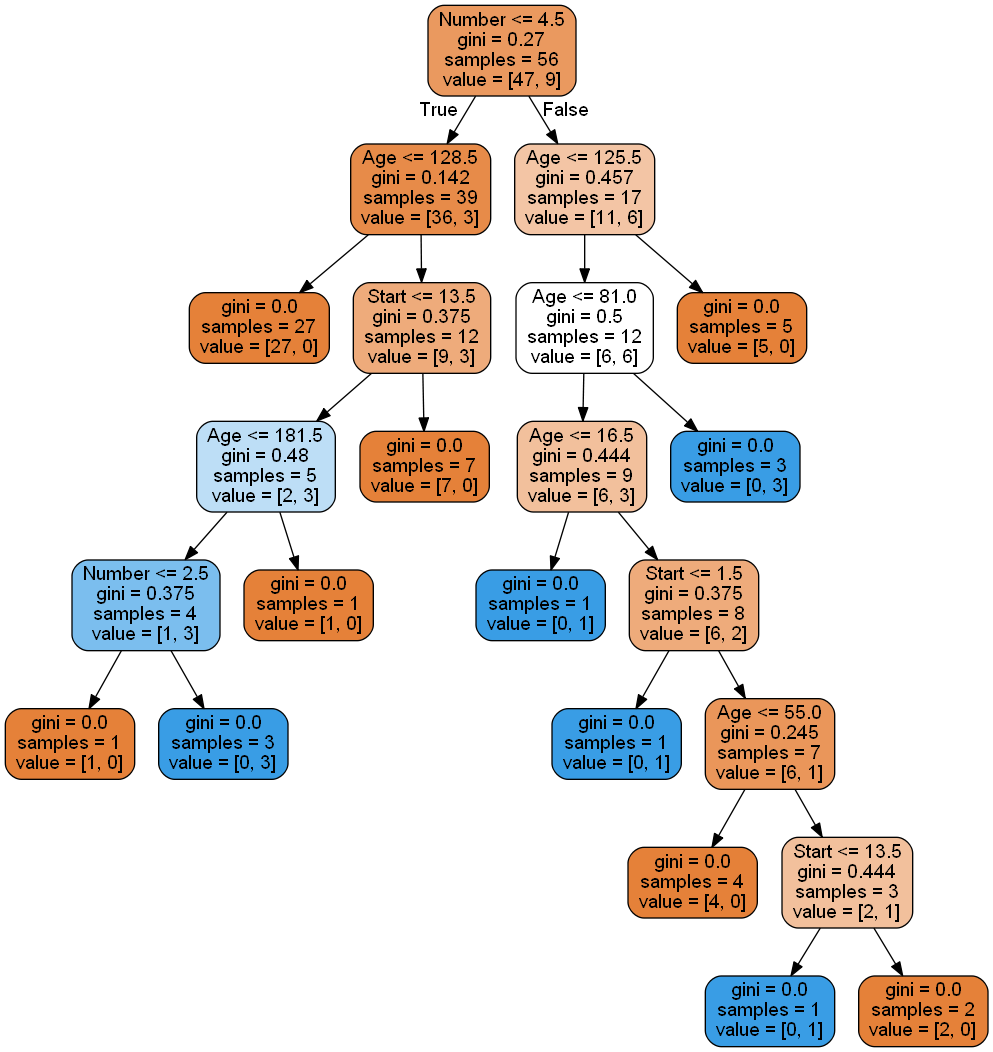

In [77]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [78]:
#Create randomforest model 
#randomforest is basically an ensemble of bunch of decision tree 
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators=200)

In [80]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
#prediction
rfc_pred = rfc.predict(X_test)

In [82]:
#evaluation
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

   micro avg       0.76      0.76      0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [83]:
#in general, randomforest is better than single decision tree for a large dataset.

In [84]:
#We also have a lot of more absent vs present. Already, our labels and
#datasets are unbalanced. There are more chances to get absent than present.
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64